## 项目说明
本次项目使用 `SQL` 在数据库中获得数据，之后使用相应的工具来完成数据分析。

### 数据获取
从数据库的表单(`city_data`、`city_list` 以及 `global_data`) 删选数据:

* city_list - 这个表包含数据库中的城市和国家列表。看看这个列表，找到离你所在城市最近的城市。
* city_data - 这个表包含每个城市每年的平均气温 (ºC)。
* global_data - 这个表包含每年的全球平均气温 (ºC)。

数据使用 `SQL` 语句来得到相关数据，数据获取步骤如下：
1. 首先通过以下语句得到全球温度数据，并且保存为 `GlobalWether.csv`：

    ```{SQL}
    SELECT *
        FROM global_data;
    ```

2. 之后通过以下语句得到关于成都、昆明以及上海等三地的温度数据，并且保存为 `LocalWether.csv`:

    ```{SQL}
    SELECT *
        FROM city_data
    WHERE city in ('Chengdu', 'Kunming', 'Shanghai');
    ```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("ChinaCityList.csv")

In [3]:
global_wether = pd.read_csv("GlobalWether.csv")
local_wether = pd.read_csv("LocalWether.csv")

In [4]:
global_wether.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
global_wether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [6]:
global_wether.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


从上面的数据可知，自 1750 年至 2015 年之间，平均温度数据是完备的，没有缺失值而且数据类型是正确的。相对全球数据进行分析展示其趋势图：

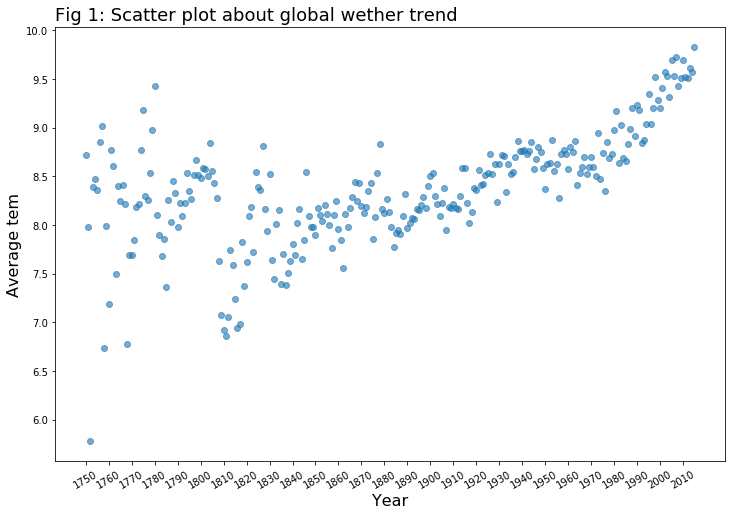

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(global_wether["year"], global_wether["avg_temp"],alpha=0.6)
plt.title("Fig 1: Scatter plot about global wether trend ", loc="left", fontsize=18)
plt.ylabel("Average tem", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(np.arange(1750, 2015, 10))


# 获取当前的坐标轴, gca = get current axis
ax = plt.gca()
ax.tick_params(axis="x", labelsize=10, labelrotation=30.)
# ax.set_xticks(np.arange(1750, 2025, 10))
# ax.set_xticklabels([global_wether["year"][i] for i in range(0, 267, 10)])

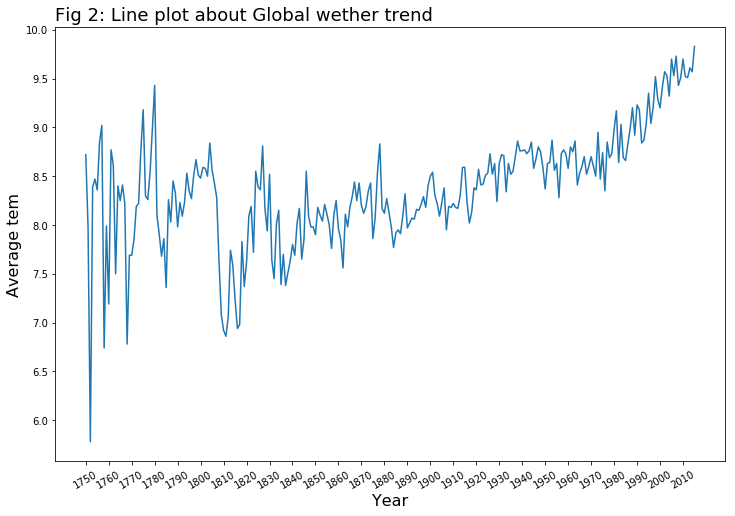

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(global_wether["year"], global_wether["avg_temp"])

plt.title("Fig 2: Line plot about Global wether trend", loc="left", fontsize=18)
plt.ylabel("Average tem", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(np.arange(1750, 2015, 10))


# 获取当前的坐标轴, gca = get current axis
ax = plt.gca()
ax.tick_params(axis="x", labelsize=10, labelrotation=30.)
# ax.set_xticks(np.arange(1750, 2025, 10))
# ax.set_xticklabels([global_wether["year"][i] for i in range(0, 267, 10)])

In [9]:
# average with moving
def move_average(data, field=None, step=1):
    """
    parameter:
    data is the origin data
    field is the calculate the mean with field in the data
    step is the number of the moving window
    """
    data_copy = data.copy()
    data_copy["move_avg_temp"] = data_copy[field].rolling(step).mean()
    return data_copy
     

In [10]:
# calculate the moving 3 step
global_wether_move_average = move_average(global_wether, "avg_temp", step=3)

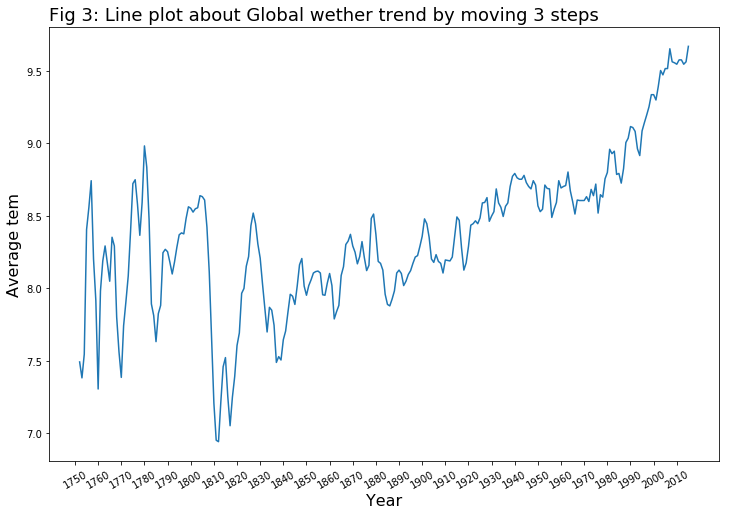

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(global_wether_move_average["year"], global_wether_move_average["move_avg_temp"])

plt.title("Fig 3: Line plot about Global wether trend by moving 3 steps", loc="left", fontsize=18)
plt.ylabel("Average tem", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(np.arange(1750, 2015, 10))


# 获取当前的坐标轴, gca = get current axis
ax = plt.gca()
ax.tick_params(axis="x", labelsize=10, labelrotation=30.)
# ax.set_xticks(np.arange(1750, 2025, 10))
# ax.set_xticklabels([global_wether["year"][i] for i in range(0, 267, 10)])

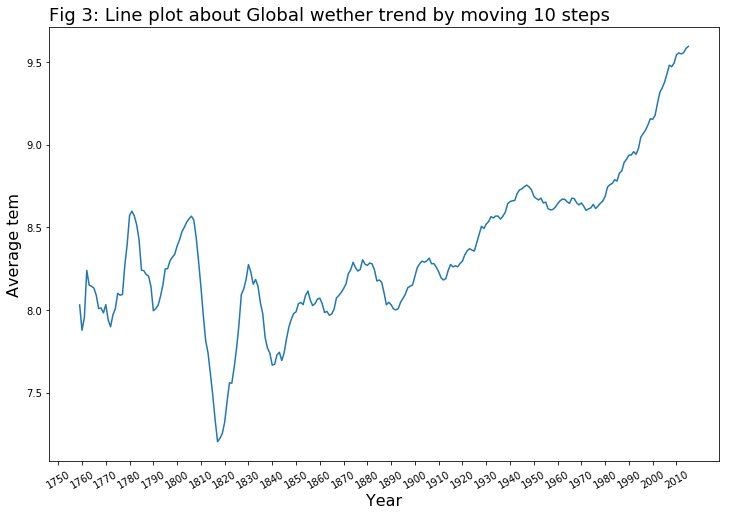

In [12]:
# calculate the moving 10 step
global_wether_move_average = move_average(global_wether, "avg_temp", step=10)

plt.figure(figsize=(12, 8))
plt.plot(global_wether_move_average["year"], global_wether_move_average["move_avg_temp"])

plt.title("Fig 3: Line plot about Global wether trend by moving 10 steps", loc="left", fontsize=18)
plt.ylabel("Average tem", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(np.arange(1750, 2015, 10))


# 获取当前的坐标轴, gca = get current axis
ax = plt.gca()
ax.tick_params(axis="x", labelsize=10, labelrotation=30.)
# ax.set_xticks(np.arange(1750, 2025, 10))
# ax.set_xticklabels([global_wether["year"][i] for i in range(0, 267, 10)])

In [13]:
local_wether.head()

,year,city,country,avg_temp
0,1820,Chengdu,China,9.14
1,1821,Chengdu,China,10.29
2,1822,Chengdu,China,10.39
3,1823,Chengdu,China,10.68
4,1824,Chengdu,China,NaN


In [14]:
local_wether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 4 columns):
year        565 non-null int64
city        565 non-null object
country     565 non-null object
avg_temp    545 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.7+ KB


In [15]:
local_wether[np.isnan(local_wether["avg_temp"])]

,year,city,country,avg_temp
4,1824,Chengdu,China,NaN
5,1825,Chengdu,China,NaN
6,1826,Chengdu,China,NaN
7,1827,Chengdu,China,NaN
8,1828,Chengdu,China,NaN
9,1829,Chengdu,China,NaN
10,1830,Chengdu,China,NaN
11,1831,Chengdu,China,NaN
12,1832,Chengdu,China,NaN
19,1839,Chengdu,China,NaN


检视数据发现在成都和昆明两个城市中存在缺失值，两个城市的缺失数据都是在在 1824 年至 1939 年。

In [16]:
def plot_scatter(data, x_field, y_field):
    plt.figure(figsize=(12, 8))
    plt.plot(data[x_field], data[y_field])

    plt.ylabel("Average tem", fontsize=16)
    plt.xlabel("Year", fontsize=16)
    plt.xticks(np.arange(data[x_field].min(), data[x_field].max(), 10))


    # 获取当前的坐标轴, gca = get current axis
    ax = plt.gca()
    ax.tick_params(axis="x", labelsize=10, labelrotation=30.)
    return plt

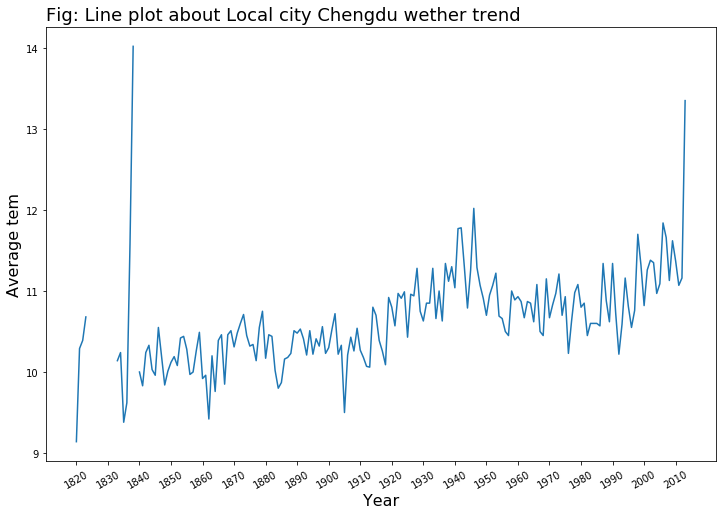

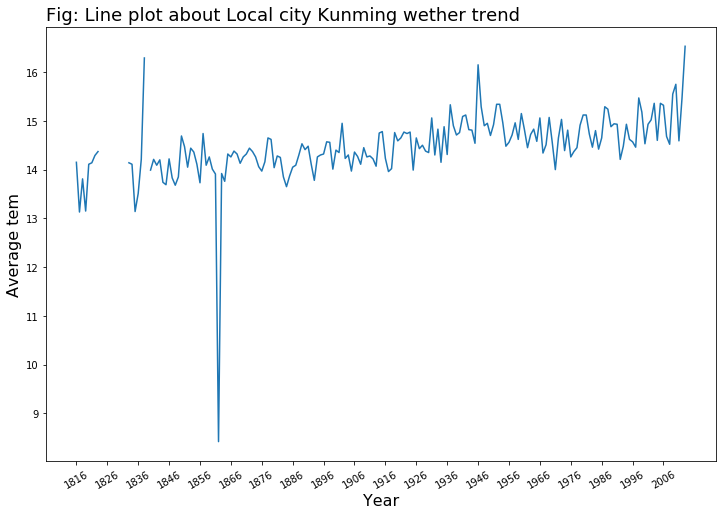

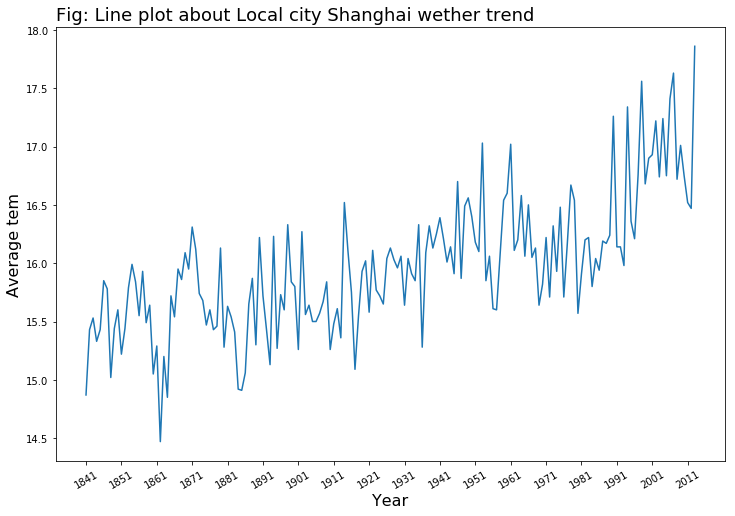

In [17]:
for city in ['Chengdu', 'Kunming', 'Shanghai']:
    plt = plot_scatter(local_wether[local_wether["city"] == city], "year", "avg_temp")
    plt.title("Fig: Line plot about Local city %s wether trend" % city, loc="left", fontsize=18)

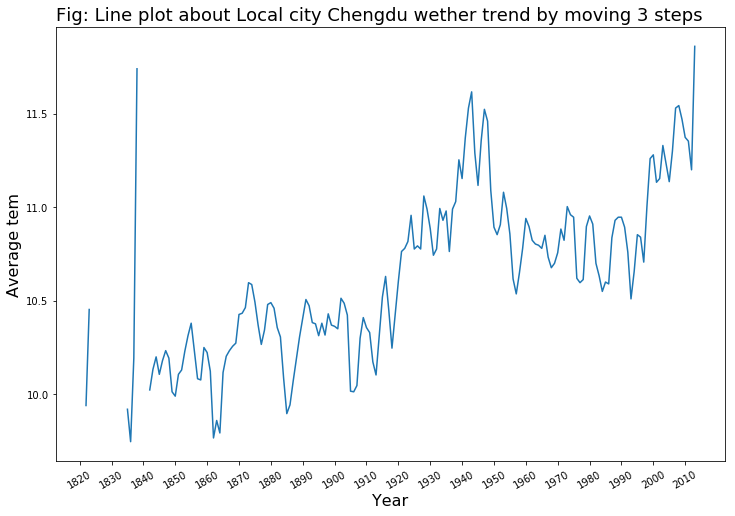

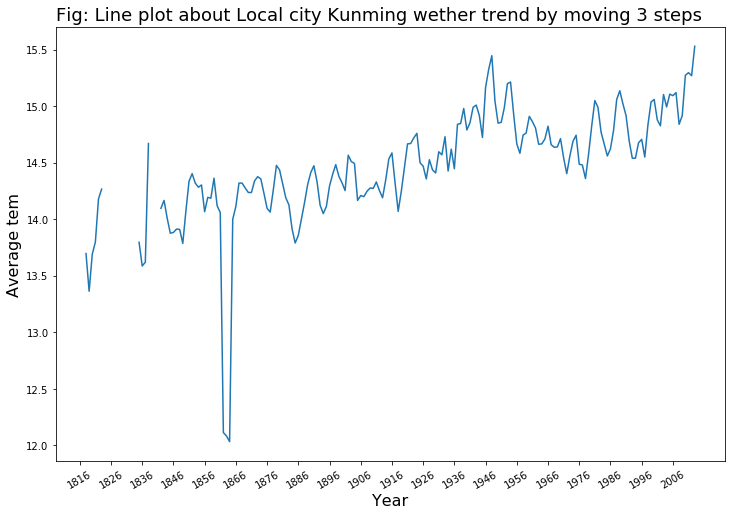

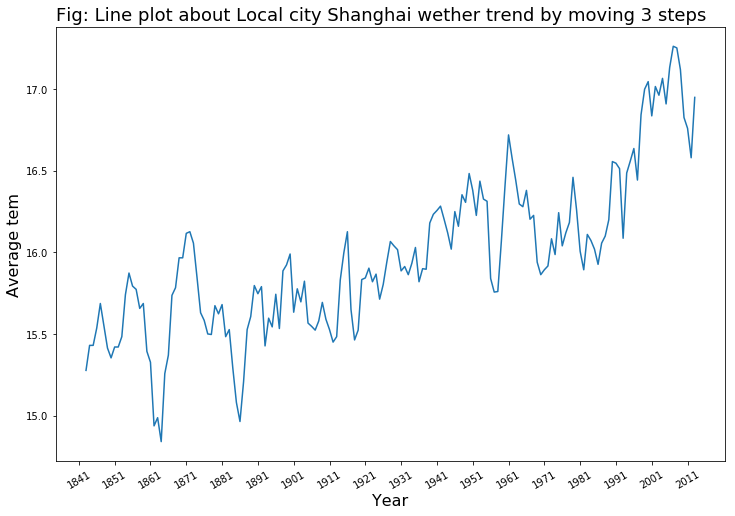

In [18]:
for city in ['Chengdu', 'Kunming', 'Shanghai']:
    plt = plot_scatter(move_average(local_wether[local_wether["city"] == city], "avg_temp", 3), "year", "move_avg_temp")
    plt.title("Fig: Line plot about Local city %s wether trend by moving 3 steps" % city, loc="left", fontsize=18)

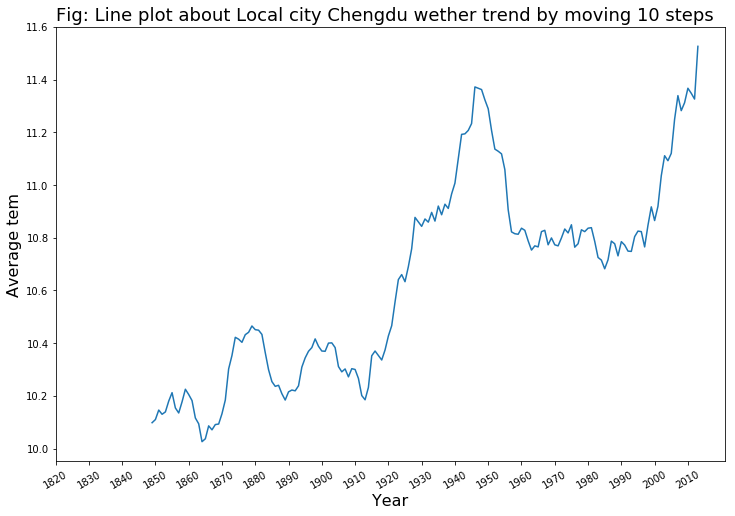

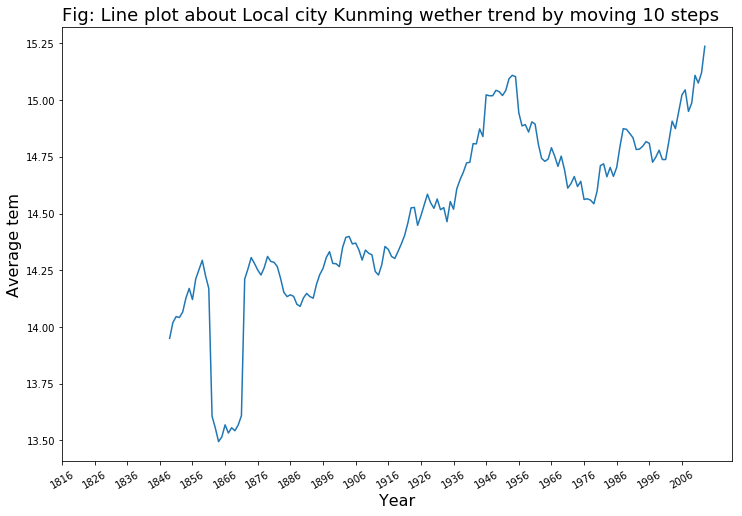

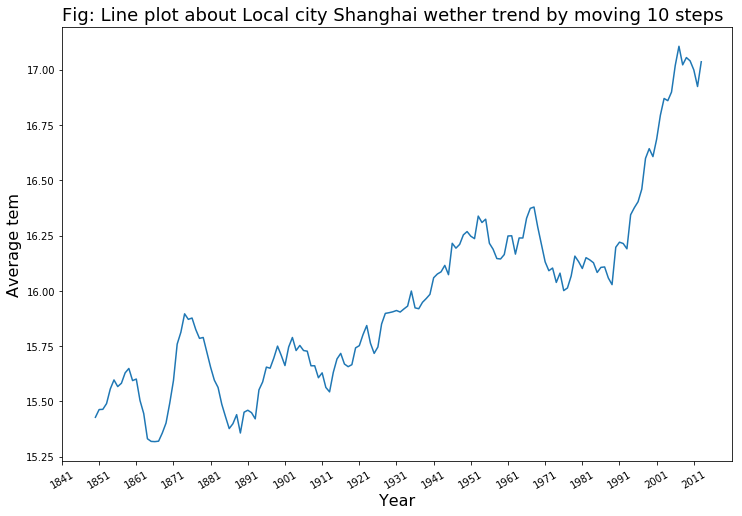

In [19]:
for city in ['Chengdu', 'Kunming', 'Shanghai']:
    plt = plot_scatter(move_average(local_wether[local_wether["city"] == city], "avg_temp", 10), "year", "move_avg_temp")
    plt.title("Fig: Line plot about Local city %s wether trend by moving 10 steps" % city, loc="left", fontsize=18)

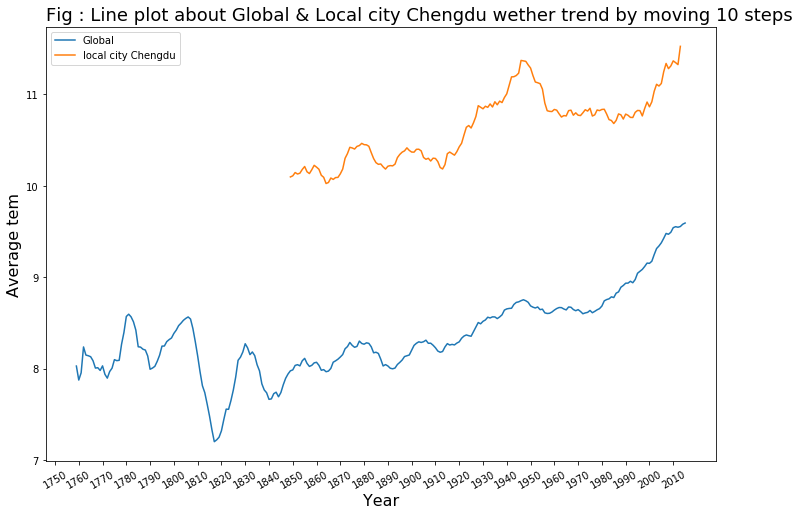

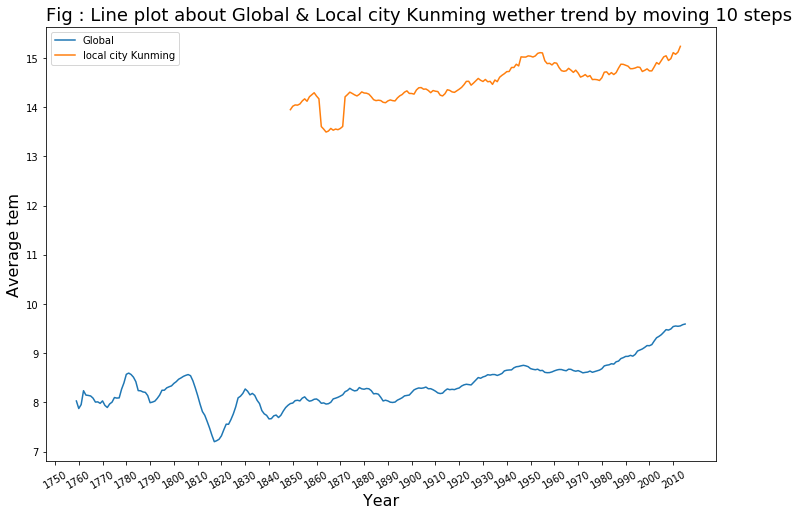

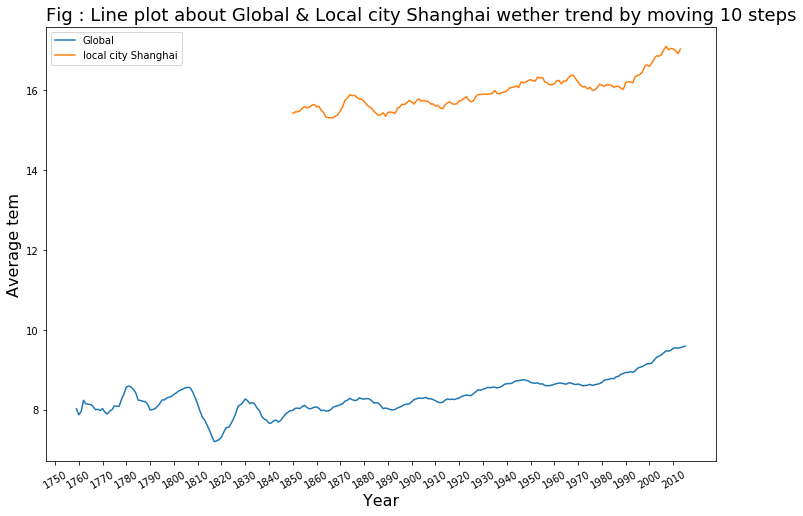

In [20]:
for city in ['Chengdu', 'Kunming', 'Shanghai']:
    
    global_wether_move_average = move_average(global_wether, "avg_temp", step=10)
    local_city_wether = local_wether[local_wether["city"] == city]
    lcoal_city_wether_move_average = move_average(local_city_wether, "avg_temp", step=10)
    plt.figure(figsize=(12, 8))
    global_line = plt.plot(global_wether_move_average["year"], global_wether_move_average["move_avg_temp"])

    plt.title("Fig : Line plot about Global & Local city %s wether trend by moving 10 steps" % city, loc="left", fontsize=18)
    plt.ylabel("Average tem", fontsize=16)
    plt.xlabel("Year", fontsize=16)
    plt.xticks(np.arange(1750, 2015, 10))

                                                 
    local_line = plt.plot(lcoal_city_wether_move_average["year"], lcoal_city_wether_move_average["move_avg_temp"])
    
    # 获取当前的坐标轴, gca = get current axis
    ax = plt.gca()
    ax.tick_params(axis="x", labelsize=10, labelrotation=30.)
    handles, labels = ax.get_legend_handles_labels()
    labels = ["Global", "local city %s" % city]
    ax.legend(handles, labels)
#     plt.legend()
    plt.show()

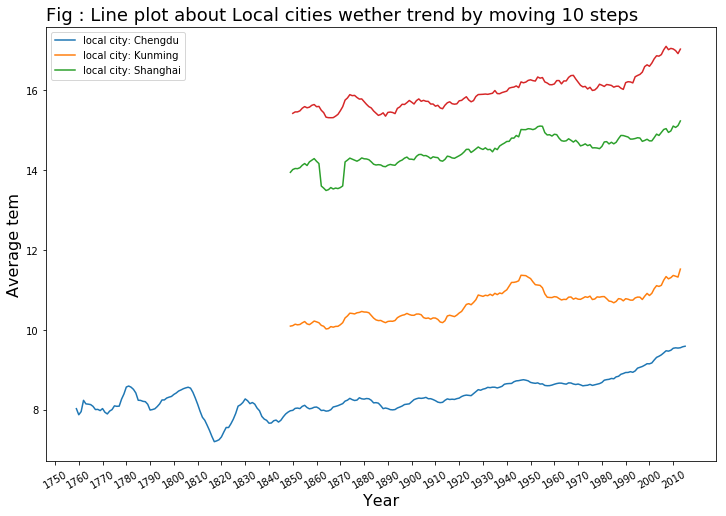

In [21]:
global_wether_move_average = move_average(global_wether, "avg_temp", step=10)
plt.figure(figsize=(12, 8))
global_line = plt.plot(global_wether_move_average["year"], global_wether_move_average["move_avg_temp"])

plt.title("Fig : Line plot about Local cities wether trend by moving 10 steps", loc="left", fontsize=18)
plt.ylabel("Average tem", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(np.arange(1750, 2015, 10))

labels = []
for city in ['Chengdu', 'Kunming', 'Shanghai']:
    local_city_wether = local_wether[local_wether["city"] == city]
    lcoal_city_wether_move_average = move_average(local_city_wether, "avg_temp", step=10)
                          
    local_line = plt.plot(lcoal_city_wether_move_average["year"], lcoal_city_wether_move_average["move_avg_temp"])
    labels.append("local city: %s" % city)

    
# 获取当前的坐标轴, gca = get current axis
ax = plt.gca()
ax.tick_params(axis="x", labelsize=10, labelrotation=30.)

handles, all_labels = ax.get_legend_handles_labels()
all_labels = labels
# ["Global", 'Chengdu', 'Kunming', 'Shanghai']
ax.legend(handles, all_labels)

plt.show()

## 结论
最后使用移动 10 步的方式来计算移动平均值，从最终结果可以看出，选择的国内三个城市成都、上海以及昆明的平均温度均比全球温度高。另外在国内中成都温度偏低，远低于昆明和上海。另外就是全总总体温度是表现升高的趋势。国内各城市的温度升高时期有细微差别，这点还需要细致研究。